 # PyPRT - Creation of 3D GIS Content (Parks)


In [1]:
import sys
import os

from arcgis.gis import GIS
from arcgis.geocoding import geocode
from IPython.display import IFrame

import pyprt
from pyprt.pyprt_arcgis import arcgis_to_pyprt

gis = GIS(username='CLechot_zurich')

Enter password: ········


In [2]:
pyprt.initialize_prt()

if(not pyprt.is_prt_initialized()):
    raise Exception("PRT is not initialized")

[PRT] [2020-02-14 11:23:13] [info] Esri Procedural Runtime
[PRT] [2020-02-14 11:23:13] [info] Version: 2.1.5704 | Build Date: Tue 09/03/2019 06:40 PM | Build Config: PRT_BC_REL PRT_CC_OPT PRT_TC_VC141 | OS: win32 | ARCH: x86_64
[PRT] [2020-02-14 11:23:13] [debug] prtPlugins item 0: 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib'
[PRT] [2020-02-14 11:23:13] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\com.esri.prt.unreal.dll': The specified module could not be found.

[PRT] [2020-02-14 11:23:13] [warning] failed to load library com.esri.prt.unreal.dll
[PRT] [2020-02-14 11:23:13] [error] failed to load library: error while loading library 'c:\users\cami9495\documents\esri-cityengine-sdk-master\examples\py4prt\pyprt\pyprt\lib\DatasmithSDK.dll': The specified module could not be found.

[PRT] [2020-02-14 11:23:13] [warning] failed to load library D

### Story: Zürich Bahnhofstrasse

In [3]:
existing_id = '65696aefd99445bf86bf682a7f2530c6'
existing = gis.content.get(existing_id)

In [8]:
map0 = gis.map(mode='3D')
location = geocode("Zurich")[0]
map0.extent = location['extent']
map0

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [9]:
map0.add_layer(existing)

### Get parks parcels from ArcGIS Online

<Item title:"ZurichParksParcels" type:Feature Layer Collection owner:CLechot_zurich>
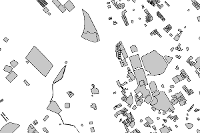

In [10]:
item = gis.content.get('513577e3f69646e49e3f7f8f99f6040f')
item

In [11]:
map1 = gis.map()
map1.extent = item.extent
map1.add_layer(item, {'opacity': 0.5})
map1

MapView(layout=Layout(height='400px', width='100%'))

#### Region delimiting/ IDs of the parks parcels to redevelop : Zürich old town

In [12]:
id_list = (192, 510, 797, 1026, 1031, 1247, 1533,
           1570, 1594, 2005, 2215, 2469, 2477, 2728)

In [13]:
filtered_parks_set = item.layers[0].query(
    where='shape__id IN ' + str(id_list), return_z=True)
filtered_parks_set

<FeatureSet> 14 features

In [14]:
map2 = gis.map()
map2.extent = item.extent
map2

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
map2.add_layer(filtered_parks_set)
map2.zoom_to_layer(item=filtered_parks_set)

### Get the parcels geometry

In [16]:
initial_geometries_from_set = arcgis_to_pyprt(filtered_parks_set)

### PRT generation

<Item title:"Greenspace Construction_smallversion" type:Rule Package owner:CLechot_zurich>
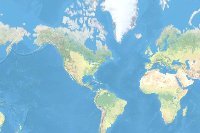

In [17]:
rpk = gis.content.get('2c31f077021b495cbfe4097227fdd78e')
attrs = {'ruleFile': 'rules/Landscape_Design_Greenspace/Greenspace ConstructionSMALL.cgb',
         'startRule': 'Default$GreenSpace', 'shapeName': 'Trees'}
rpk

In [18]:
export_file_name = 'ex8_GeneratedParks'
enc_optionsSLPK = {'sceneType': 'Local', 'baseName': export_file_name, 'sceneWkid': '3857', 'layerTextureEncoding': ['2'], 'layerEnabled': [True], 'layerUID': ['1'], 'layerName': ['1'], 'layerTextureQuality': [
    1.0], 'layerTextureCompression': [9], 'layerTextureScaling': [1.0], 'layerTextureMaxDimension': [2048], 'layerFeatureGranularity': ['0'], 'layerBackfaceCulling': [False], 'outputPath': os.path.join(os.getcwd(), 'output')}
os.makedirs(enc_optionsSLPK['outputPath'], exist_ok=True)

In [19]:
mod_parcel = pyprt.ModelGenerator(initial_geometries_from_set)
generated_parks = mod_parcel.generate_model(
    [attrs], rpk.download(), 'com.esri.prt.codecs.I3SEncoder', enc_optionsSLPK)

[PRT] [2020-02-14 12:47:38] [info] using rule package C:\Users\cami9495\AppData\Local\Temp\GreenspaceConstructionSMALL.rpk

[PRT] [2020-02-14 12:47:38] [debug] resolve map = <ResolveMap>
	<attribute key="/Example_Planning_04_Landscape_Design__2019_1/rules/Landscape_Design_Greenspace/Support/Plant_LoaderSMALL.cga" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CGreenspaceConstructionSMALL.rpk!/rules/Landscape_Design_Greenspace/Support/Plant_LoaderSMALL.cga" type="str"/>
	<attribute key="/Example_Planning_04_Landscape_Design__2019_1/rules/Landscape_Design_Greenspace/Support/Greenspace RulesSMALL.cga" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CGreenspaceConstructionSMALL.rpk!/rules/Landscape_Design_Greenspace/Support/Greenspace%20RulesSMALL.cga" type="str"/>
	<attribute key="rules/Landscape_Design_Greenspace/Support/Plant_LoaderSMALL.cga" value="rpk:file:/C:%5CUsers%5Ccami9495%5CAppData%5CLocal%5CTemp%5CGreenspaceConstructionSMALL.rpk!/rules/Landsc

[PRT] [2020-02-14 12:48:04] [debug] width 245, height 490, rasterCount 3
[PRT] [2020-02-14 12:48:04] [debug] width 587, height 234, rasterCount 3
[PRT] [2020-02-14 12:48:04] [debug] width 500, height 500, rasterCount 3
[PRT] [2020-02-14 12:48:04] [debug] width 106, height 106, rasterCount 3
[PRT] [2020-02-14 12:48:04] [debug] width 1002, height 1010, rasterCount 3
[PRT] [2020-02-14 12:48:05] [debug] width 245, height 490, rasterCount 3
[PRT] [2020-02-14 12:48:05] [debug] width 587, height 234, rasterCount 3
[PRT] [2020-02-14 12:48:05] [debug] width 500, height 500, rasterCount 3
[PRT] [2020-02-14 12:48:05] [debug] width 106, height 106, rasterCount 3
[PRT] [2020-02-14 12:48:05] [debug] width 1002, height 1010, rasterCount 3
[PRT] [2020-02-14 12:48:05] [warning] JPG encoder: ignoring texture channels other than the first 3.
[PRT] [2020-02-14 12:48:06] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:06] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-

[PRT] [2020-02-14 12:48:26] [debug] width 500, height 500, rasterCount 3
[PRT] [2020-02-14 12:48:26] [debug] width 234, height 234, rasterCount 3
[PRT] [2020-02-14 12:48:26] [debug] width 1002, height 1002, rasterCount 3
[PRT] [2020-02-14 12:48:27] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:27] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:27] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:27] [debug] width 1002, height 2004, rasterCount 4
[PRT] [2020-02-14 12:48:28] [debug] width 501, height 1002, rasterCount 4
[PRT] [2020-02-14 12:48:28] [debug] width 501, height 1002, rasterCount 4
[PRT] [2020-02-14 12:48:28] [debug] width 1002, height 2004, rasterCount 3
[PRT] [2020-02-14 12:48:28] [debug] width 501, height 1002, rasterCount 3
[PRT] [2020-02-14 12:48:28] [debug] width 501, height 1002, rasterCount 3
[PRT] [2020-02-14 12:48:28] [debug] width 1002, height 2004, rasterCount 3
[PRT] [2020-02-14 12:48:28] [debu

[PRT] [2020-02-14 12:48:44] [debug] width 1002, height 2004, rasterCount 3
[PRT] [2020-02-14 12:48:44] [debug] width 501, height 1002, rasterCount 3
[PRT] [2020-02-14 12:48:44] [debug] width 501, height 1002, rasterCount 3
[PRT] [2020-02-14 12:48:44] [debug] width 1002, height 2004, rasterCount 3
[PRT] [2020-02-14 12:48:46] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:46] [debug] width 1024, height 1024, rasterCount 3
[PRT] [2020-02-14 12:48:46] [debug] width 1024, height 1024, rasterCount 3


### From Python to ArcGIS

In [20]:
dataset = os.path.join(enc_optionsSLPK['outputPath'], export_file_name+'.slpk')

In [21]:
item_to_upload = gis.content.add({'type': 'Scene Package'}, data=dataset)

In [22]:
published_item = item_to_upload.publish()

In [23]:
display(published_item)

<Item title:"ex8_GeneratedParksTEST" type:Scene Layer owner:CLechot_zurich>

### Visualization

In [28]:
map3 = gis.map(mode='3D')
map3.basemap = 'gray' 
map3.add_layer(published_item)
map3.add_layer(existing)
map3.extent = published_item.extent
map3

MapView(layout=Layout(height='400px', width='100%'), mode='3D')

In [11]:
pyprt.shutdown_prt()